In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Final_data'
os.chdir(path)

In [3]:
df = pd.read_csv('main_data.csv')
df.head()

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_cm,max_cm,sig_cm,turb_cm,tp,sine,cosine,target
0,01.05.2023 07:08,210090000.0,88.0,8.545379,53.56142,0.00,110.0,53.49468,8.504,7.909105,1.0,502.0,58.06,36.66,52.61,356.8,0.484810,-0.874620,0.45
1,01.05.2023 07:11,210090000.0,88.0,8.554007,53.55247,1.15,112.0,53.49468,8.504,7.226372,1.0,506.0,53.66,35.75,53.88,347.8,0.500000,-0.866025,0.45
2,01.05.2023 07:14,210090000.0,88.0,8.562378,53.54377,1.11,111.0,53.49468,8.504,6.685145,1.0,510.0,55.09,37.16,57.33,359.2,0.484810,-0.874620,0.45
3,01.05.2023 07:17,210090000.0,88.0,8.567384,53.53481,1.05,110.0,53.49468,8.504,6.121669,1.0,514.0,55.09,38.33,62.32,362.5,-0.052336,-0.998630,0.45
4,01.05.2023 07:20,210090000.0,88.0,8.562150,53.52593,1.05,110.0,53.49468,8.504,5.182657,1.0,518.0,55.09,36.16,65.35,346.5,-0.681998,-0.731354,0.45


In [4]:
# Convert the date-time column to a datetime object with the specified format
df['ais_timestamp'] = pd.to_datetime(df['ais_timestamp'], format='%d.%m.%Y %H:%M')

# Convert the datetime object to a numeric representation, like Unix timestamp
df['ais_timestamp'] = df['ais_timestamp'].view('int64')

### Descriptive Statitics

In [5]:
df.describe()

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_cm,max_cm,sig_cm,turb_cm,tp,sine,cosine,target
count,8.126600e+04,8.126600e+04,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000,81266.000000
mean,1.686327e+18,2.649321e+08,93.261118,8.646585,53.233678,0.376030,45.018790,53.227032,8.641609,6.717206,0.975943,429.322472,98.392368,65.472657,142.671092,353.343334,-0.021324,0.068781,33.243870
std,1.209685e+15,8.866586e+07,41.434773,0.200167,0.336605,0.893185,42.166132,0.334258,0.211386,6.643574,0.153227,187.385239,53.993779,36.852848,79.717266,69.111791,0.615920,0.784518,70.203017
min,1.682708e+18,1.168452e+06,0.000000,8.473387,52.314200,0.000000,0.000000,52.306180,8.487362,0.000000,0.000000,105.000000,19.660000,13.320000,13.380000,188.200000,-1.000000,-1.000000,0.000000
25%,1.685591e+18,2.115004e+08,80.000000,8.499127,53.081540,0.000000,0.000000,53.082130,8.496834,2.054591,1.000000,292.000000,56.500000,36.800000,73.190000,299.300000,-0.544639,-0.809017,1.400000
50%,1.686318e+18,2.446706e+08,85.000000,8.553160,53.341130,0.020000,53.000000,53.340190,8.505507,4.456199,1.000000,430.000000,84.180000,55.500000,137.700000,362.600000,-0.017452,0.224951,9.750000
75%,1.687327e+18,3.040103e+08,89.000000,8.787632,53.515430,0.700000,81.000000,53.491760,8.780329,9.339045,1.000000,603.000000,130.000000,86.970000,197.600000,407.200000,0.484810,0.898794,47.130000
max,1.688168e+18,6.360228e+08,500.000000,9.220220,53.577660,44.780000,320.000000,53.578160,9.219920,32.254486,1.000000,751.000000,316.400000,206.800000,542.200000,557.400000,1.000000,1.000000,878.350000


### Missing Values 

In [6]:
df.isnull().sum()

ais_timestamp         0
vessel_mmsi           0
vessel_length         0
lon                   0
lat                   0
distance              0
speed                 0
destination_lat       0
destination_lon       0
remaining_distance    0
lock_status           0
water_level_cm        0
max_cm                0
sig_cm                0
turb_cm               0
tp                    0
sine                  0
cosine                0
target                0
dtype: int64

### Correlation Analysis 

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_cm,max_cm,sig_cm,turb_cm,tp,sine,cosine,target
ais_timestamp,1.000000,-0.025600,0.002563,-0.158729,0.067771,-0.019068,0.002474,0.066546,-0.157317,-0.016630,0.184504,-0.102005,-0.143295,-0.135125,0.103923,-0.231809,-0.011328,-0.009292,0.015480
vessel_mmsi,-0.025600,1.000000,0.169313,-0.234324,0.301657,-0.053816,-0.167226,0.270592,-0.256943,0.068074,0.060943,0.167205,0.026009,0.025629,0.025120,0.053618,-0.042412,-0.000342,0.133991
vessel_length,0.002563,0.169313,1.000000,-0.220565,0.195081,0.038097,0.055570,0.237356,-0.246453,0.156642,0.088518,0.185678,0.030867,0.031023,-0.015438,0.041431,-0.024284,0.074006,-0.110589
lon,-0.158729,-0.234324,-0.220565,1.000000,-0.826768,-0.070136,-0.031012,-0.815400,0.944599,-0.229241,-0.364677,-0.569001,-0.017719,-0.017804,-0.019850,0.005198,0.098792,0.000102,0.055884
lat,0.067771,0.301657,0.195081,-0.826768,1.000000,-0.036553,-0.200861,0.975851,-0.828342,0.113452,0.265487,0.440732,0.034140,0.034447,-0.015073,0.004649,-0.077470,0.047986,0.075526
distance,-0.019068,-0.053816,0.038097,-0.070136,-0.036553,1.000000,0.406485,-0.025031,-0.024123,0.106294,0.061528,0.052574,-0.025923,-0.024924,-0.002940,0.003672,0.017545,-0.051757,-0.127510
speed,0.002474,-0.167226,0.055570,-0.031012,-0.200861,0.406485,1.000000,-0.171797,0.073278,0.232924,0.039266,0.068686,-0.050318,-0.048727,0.023541,-0.012622,0.147029,-0.133750,-0.258561
destination_lat,0.066546,0.270592,0.237356,-0.815400,0.975851,-0.025031,-0.171797,1.000000,-0.861423,0.129826,0.277549,0.444935,0.037088,0.038221,-0.013726,0.016643,-0.114140,0.151614,0.050237
destination_lon,-0.157317,-0.256943,-0.246453,0.944599,-0.828342,-0.024123,0.073278,-0.861423,1.000000,-0.186994,-0.359749,-0.553875,-0.025291,-0.026024,-0.020801,-0.006717,0.191206,-0.104398,0.029986
remaining_distance,-0.016630,0.068074,0.156642,-0.229241,0.113452,0.106294,0.232924,0.129826,-0.186994,1.000000,0.058468,0.245149,-0.018791,-0.017211,0.051366,0.042229,-0.088020,-0.017933,-0.011029


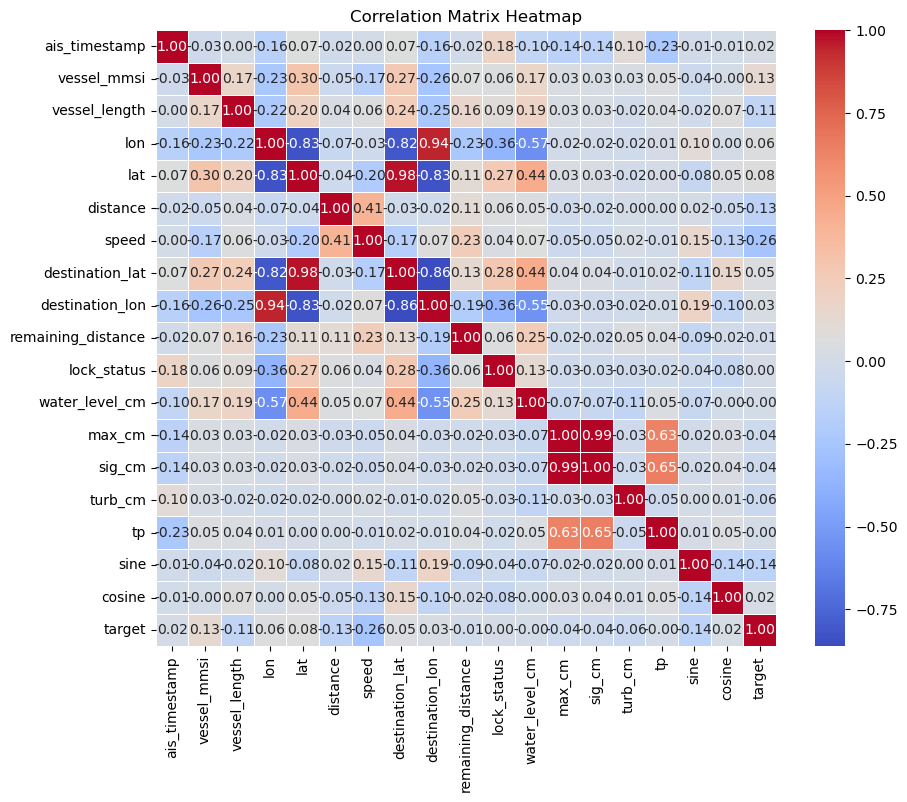

In [8]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data Distribution 

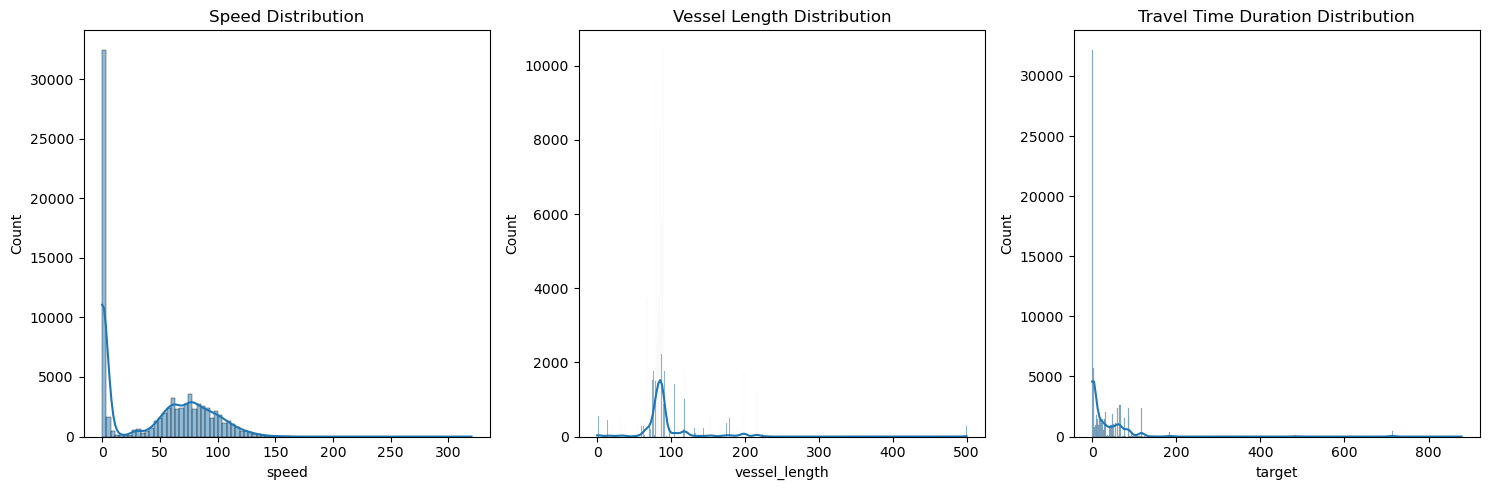

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Distribution plot for 'speed'
plt.subplot(1, 3, 1)
sns.histplot(df['speed'], kde=True)
plt.title('Speed Distribution')

# Distribution plot for 'vessel length'
plt.subplot(1, 3, 2)
sns.histplot(df['vessel_length'], kde=True)
plt.title('Vessel Length Distribution')

# Distribution plot for 'travel time duration'
plt.subplot(1, 3, 3)
sns.histplot(df['target'], kde=True)
plt.title('Travel Time Duration Distribution')

plt.tight_layout()
plt.show()

### Relationship Between Features

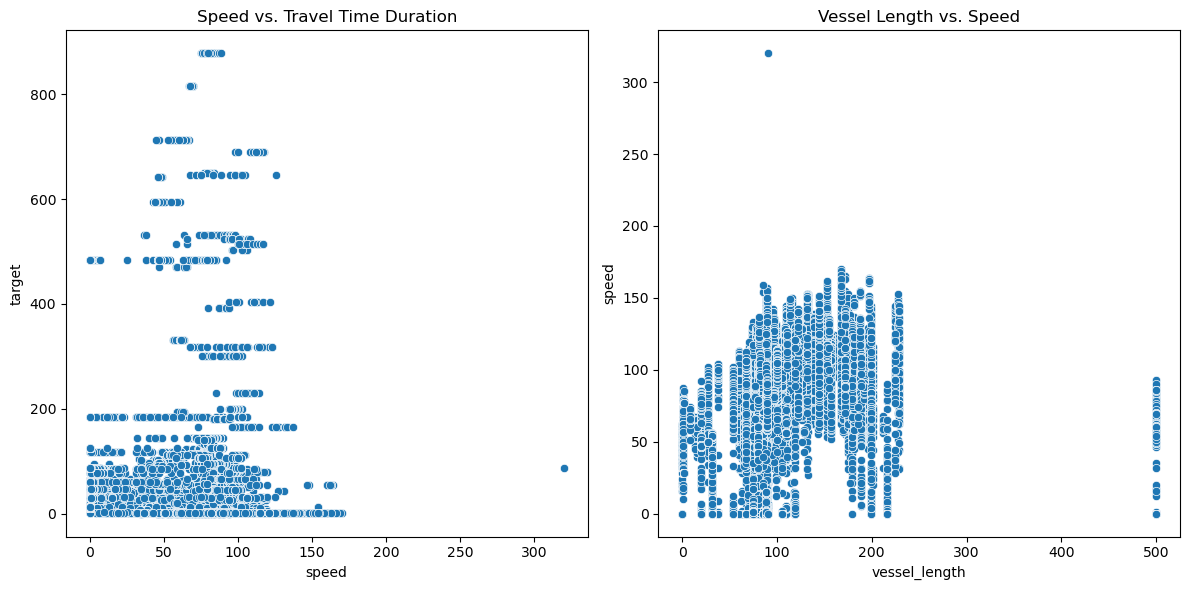

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot for Speed vs. Travel Time Duration
plt.subplot(1, 2, 1)
sns.scatterplot(x='speed', y='target', data=df)
plt.title('Speed vs. Travel Time Duration')

# Scatter plot for Vessel Length vs. Speed
plt.subplot(1, 2, 2)
sns.scatterplot(x='vessel_length', y='speed', data=df)
plt.title('Vessel Length vs. Speed')

plt.tight_layout()
plt.show()

### Univariate Analysis

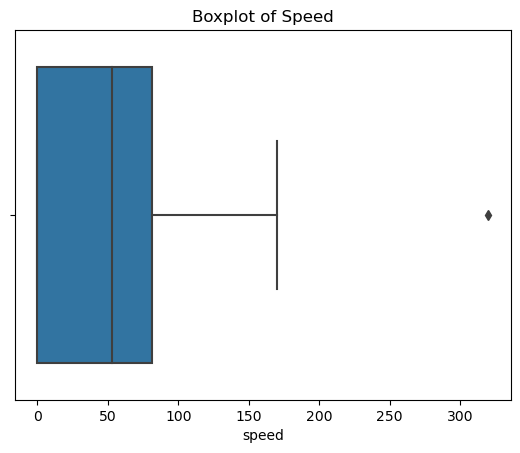

In [11]:
sns.boxplot(x=df['speed'])
plt.title('Boxplot of Speed')
plt.show()

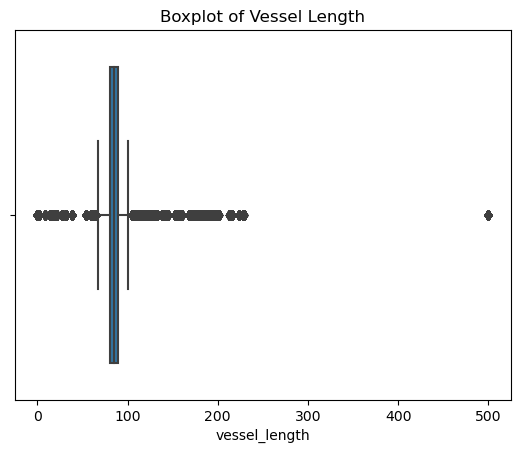

In [12]:
sns.boxplot(x=df['vessel_length'])
plt.title('Boxplot of Vessel Length')
plt.show()

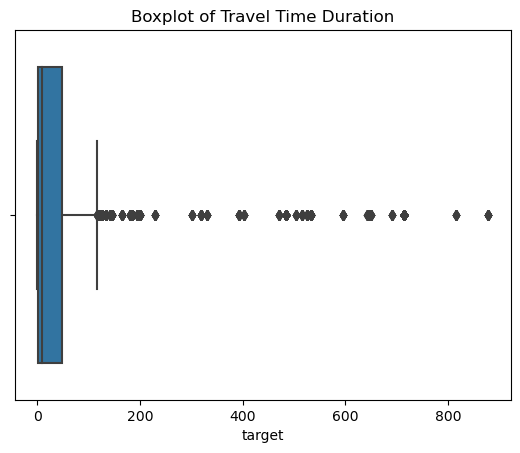

In [13]:
sns.boxplot(x=df['target'])
plt.title('Boxplot of Travel Time Duration')
plt.show()

### Bivariate Analysis

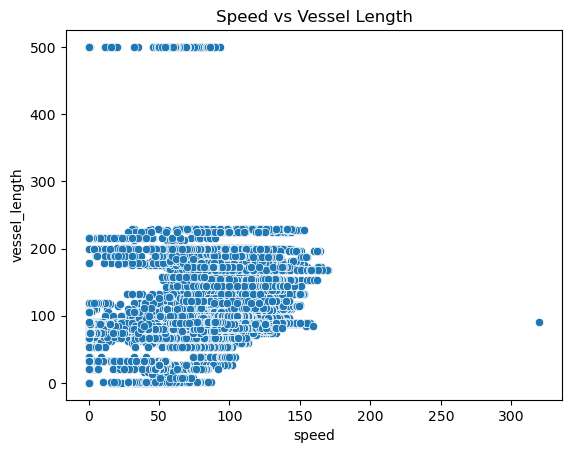

In [14]:
sns.scatterplot(x='speed', y='vessel_length', data=df)
plt.title('Speed vs Vessel Length')
plt.show()

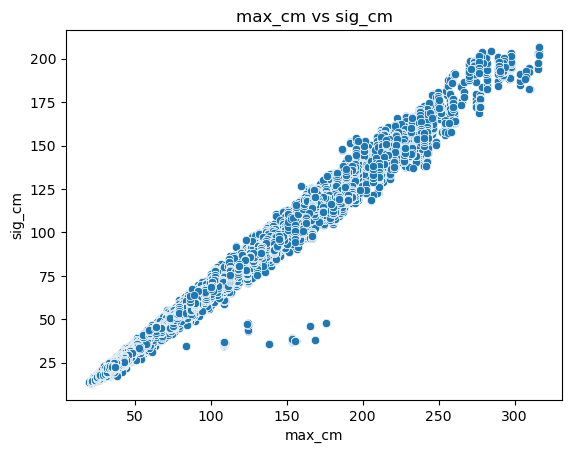

In [15]:
sns.scatterplot(x='max_cm', y='sig_cm', data=df)
plt.title('max_cm vs sig_cm')
plt.show()

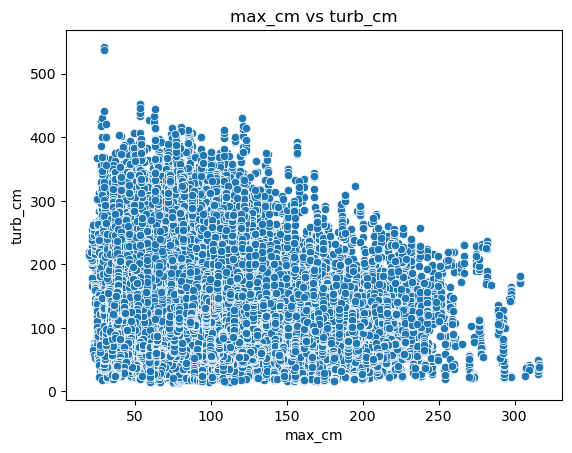

In [16]:
sns.scatterplot(x='max_cm', y='turb_cm', data=df)
plt.title('max_cm vs turb_cm')
plt.show()

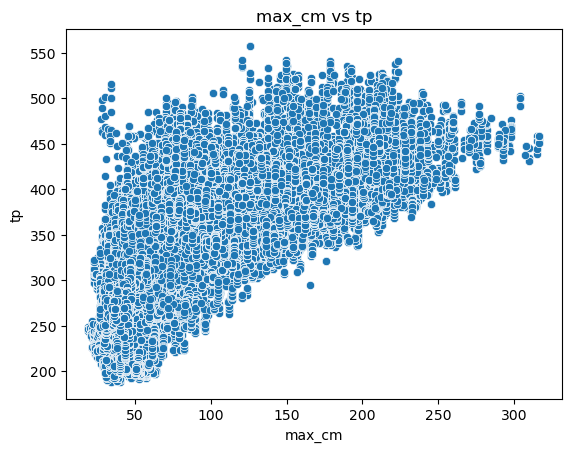

In [17]:
sns.scatterplot(x='max_cm', y='tp', data=df)
plt.title('max_cm vs tp')
plt.show()

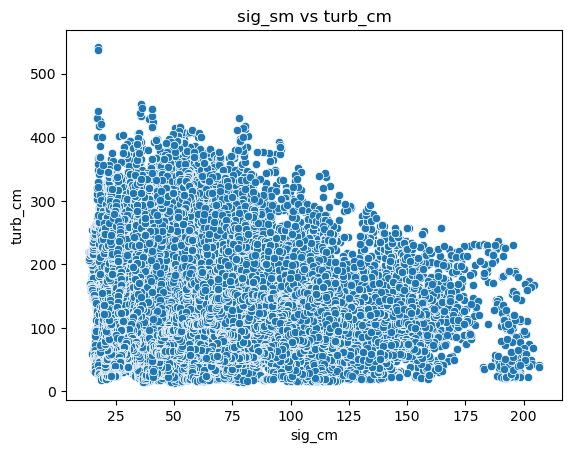

In [18]:
sns.scatterplot(x='sig_cm', y='turb_cm', data=df)
plt.title('sig_sm vs turb_cm')
plt.show()

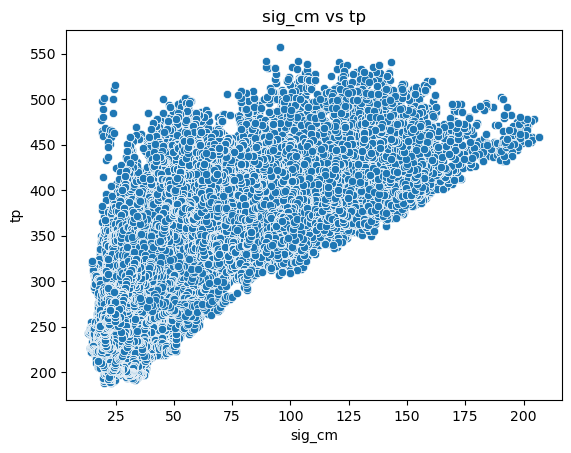

In [19]:
sns.scatterplot(x='sig_cm', y='tp', data=df)
plt.title('sig_cm vs tp')
plt.show()

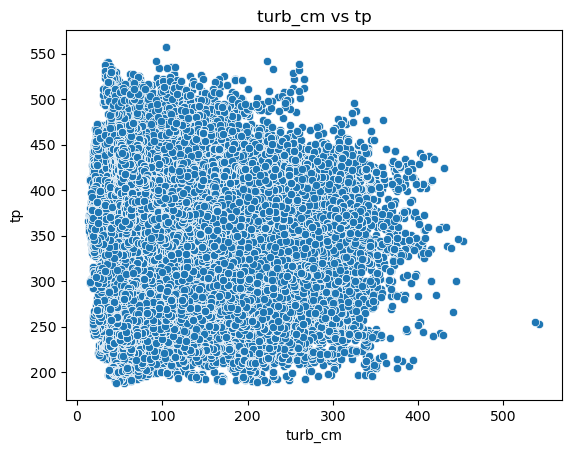

In [20]:
sns.scatterplot(x='turb_cm', y='tp', data=df)
plt.title('turb_cm vs tp')
plt.show()

### Multivariate Analysis

C:\Users\firoj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


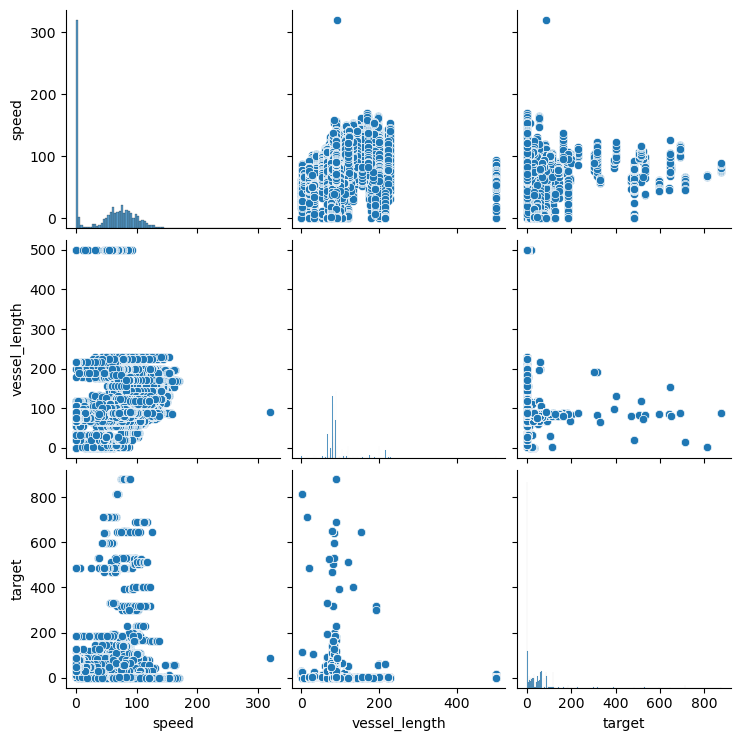

In [21]:
sns.pairplot(df[['speed', 'vessel_length', 'target']])
plt.show()